In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [380]:
df=pd.read_csv('/Users/riyachanduka/Documents/Capstone_INST736/Latest_pt.csv')

In [381]:
df.head()

,original_sheet,record_number,sheet_id,sid_number,gender,race,dob,computed_age,court_date,intake_date,...,case_number_original_field,court_original_field,judge_name_original_field,court_sentencing_original_field,charge_original_field,violation_reason_or_dont_use,judges_decision_or_dont_use,judge_name_or_dont_use,case_number_or_dont_use,charge_open_refine_field_no_use
0,active_pt,1,active_pt_1,4304458,M,B,11/11/99,18.0,1/24/19,2017-11-30T00:00:00Z,...,D043CR17001009,NaN,Chesser,no information provided,Robbery,NaN,Level 4,Chesser,D043CR17001009,robbery
1,active_pt,2,active_pt_2,3168416,M,W,2/22/94,24.0,3/11/19,2018-07-23T00:00:00Z,...,C18CR18280,NaN,Chesser,no information provided,Burlary 1st,NaN,Level 2,Chesser,C18CR18280,burglary 1st
2,active_pt,3,active_pt_3,3775956,M,W,3/15/81,37.0,1/15/19,2018-07-27T00:00:00Z,...,D043CR181093,NaN,"Riddle, Mr",no information provided,Child abuse 2,NaN,Level 3,Robert Riddle,D043CR181093,child abuse 2nd
3,active_pt,4,active_pt_4,1458033,M,B,12/8/74,43.0,11/27/18,2018-07-16T00:00:00Z,...,C18CR17107,NaN,Stamm,no information provided,Non-support,NaN,Level 2,Stamm,C18CR17107,non-support
4,active_pt,5,active_pt_5,1130717,M,B,1/26/70,48.0,2/25/19,2018-09-10T00:00:00Z,...,18K1679,NaN,Stamm,no information provided,VOP (CDS poss not mari),NaN,Level 3,Stamm,18K1679,vop - cds possession not marijuana


In [382]:
df['date']=pd.to_datetime(df['intake_date'])

In [383]:
df['year']=df['date'].dt.year

In [384]:
df['year']=df['year'].fillna(0)

In [385]:
df['year']=df.year.astype(int)

In [386]:
df.year.unique()

array([2017, 2018, 2019, 2016, 2015,    0])

In [387]:
df = df.filter(['year','Charge_Level','risk_assess_level'], axis=1)

In [388]:
df=df[df.year != 2015]
df=df[df.year != 2019]
df=df[df.year != 0]

In [411]:
df['year']=pd.to_datetime(df.year, format='%Y')

In [392]:
df['year']=df['year'].dt.year

In [393]:
df.year.unique()

array([2017, 2018, 2016])

In [394]:
df_high = df[df.Charge_Level == 'High']

In [395]:
df_high.head(10)


,year,Charge_Level,risk_assess_level
0,2017,High,Detain
1,2018,High,Detain
2,2018,High,Detain
5,2018,High,NaN
6,2018,High,Level 3
7,2018,High,Sent by judge
8,2018,High,No recommendation
10,2018,High,Sent by judge
13,2018,High,Detain
14,2018,High,Detain


In [413]:
year_min = df_high['year'].min()
year_max = df_high['year'].max()

In [396]:
df_high.shape

(1352, 3)

In [397]:
detain_by_year=df_high.groupby('year').risk_assess_level.value_counts().sort_index()

In [398]:
detain_by_year

year  risk_assess_level                                
2016  Detain                                               292
      Level 1                                                2
      Level 2                                                7
      Level 3                                                5
      Level 4                                               17
      No recommendation                                     75
      Release without pretrial supervision                  14
      Sent by judge                                          1
      Wavied                                                 1
2017  Detain                                               359
      Level 1                                                1
      Level 2                                               10
      Level 3                                                6
      Level 4                                               15
      No interview                                           1

In [399]:
detain_by_year=detain_by_year.unstack()

In [400]:
detain_by_year

risk_assess_level,Detain,Level 1,Level 2,Level 3,Level 4,No interview,No recommendation,Ordered by court,Parole Retake,Redo,Release with pretrial supervision - level unknown,Release without pretrial supervision,Sent by judge,Wavied
year,,,,,,,,,,,,,,
2016,292.0,2.0,7.0,5.0,17.0,NaN,75.0,NaN,NaN,NaN,NaN,14.0,1.0,1.0
2017,359.0,1.0,10.0,6.0,15.0,1.0,14.0,4.0,1.0,1.0,NaN,4.0,4.0,NaN
2018,424.0,6.0,6.0,17.0,14.0,NaN,6.0,NaN,NaN,NaN,2.0,15.0,24.0,NaN


In [401]:
detain_by_year.columns

Index(['Detain', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'No interview',
       'No recommendation', 'Ordered by court', 'Parole Retake', 'Redo',
       'Release with pretrial supervision - level unknown',
       'Release without pretrial supervision', 'Sent by judge', 'Wavied'],
      dtype='object', name='risk_assess_level')

In [402]:
detain_by_year.index

Int64Index([2016, 2017, 2018], dtype='int64', name='year')

In [403]:
detain_by_year=detain_by_year.drop(columns=['No interview','Ordered by court','Parole Retake','Redo','Release with pretrial supervision - level unknown','Sent by judge','Wavied'])

In [430]:
detain_by_year

risk_assess_level,Detain,Level 1,Level 2,Level 3,Level 4,No recommendation,Release without pretrial supervision
year,,,,,,,
2016,292.0,2.0,7.0,5.0,17.0,75.0,14.0
2017,359.0,1.0,10.0,6.0,15.0,14.0,4.0
2018,424.0,6.0,6.0,17.0,14.0,6.0,15.0


Text(0.5,1,'Yearly Change in Risk Assessment Level of Defendants')

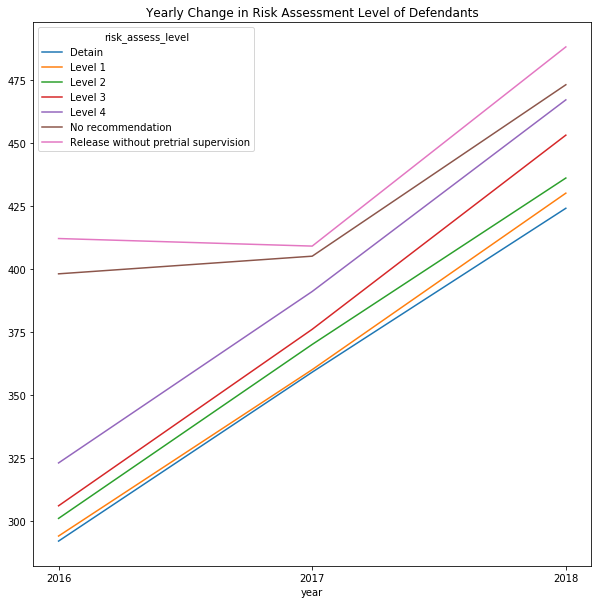

In [433]:

detain_by_year.plot.line(stacked=True,figsize=(10,10))
plt.xticks(range(year_min, year_max+1, 1))
plt.title('Yearly Change in Risk Assessment Level of Defendants')

## It can be seen that number of detained defendants increase over the years while the No recommendation cases have a little dip from 2016 to 2017 but has a sharp increase from year 2017 to 2018.

([<matplotlib.axis.XTick at 0x12fae7eb8>,
 <a list of 3 Text xticklabel objects>)

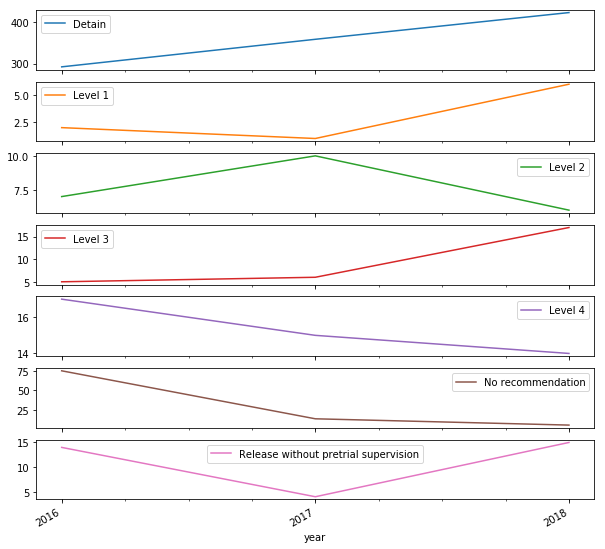

In [428]:
plt.figure(figsize=(15,7))
detain_by_year.plot(kind='line', subplots=True,figsize=(10,10))
plt.xticks(range(year_min, year_max+1, 1))